In [1]:
import qiskit
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
sys.path.insert(1, '../')
import qtm.base_qtm, qtm.constant, qtm.qtm_nqubit, qtm.fubini_study, qtm.encoding
import importlib
import os
importlib.reload(qtm.base_qtm)
importlib.reload(qtm.constant)
importlib.reload(qtm.qtm_1qubit)
importlib.reload(qtm.qtm_nqubit)

<module 'qtm.qtm_nqubit' from '..\\qtm\\qtm_nqubit.py'>

In [10]:
path = "../../experiments/binho_anzsats/"

In [11]:
dirs = os.listdir(path)

In [20]:
dirs = list(map(int, dirs))
dirs.sort()

C:\Users\haime\AppData\Local\Temp/ipykernel_2064/1176250461.py:11: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fidelities_ghz = fidelities_ghz.applymap(lambda s: np.complex(s.replace('i', 'j'))).values
C:\Users\haime\AppData\Local\Temp/ipykernel_2064/1176250461.py:14: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fidel

3
[0.99949806+2.6738594e-15j]
4
[0.75056198-2.50530363e-10j]
5
[0.49571177+3.48708507e-10j]
6
[0.07155378+4.36831592e-10j]
7
[0.02494303+6.70550759e-10j]
8
[0.35093168+9.80329913e-10j]
9
[0.33864588+3.9153403e-07j]
10
[0.00120929-1.96450084e-10j]


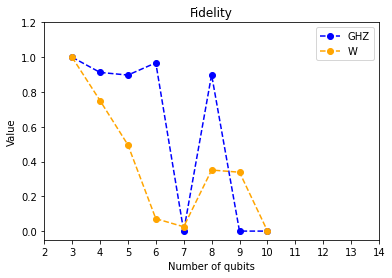

In [25]:
fidelitiesghz = []
fidelitiesw = []
fidelitieshaar = []
tracesghz = []
tracesw = []
traceshaar = []

for dir in dirs:
    dir = str(dir)
    fidelities_ghz = pd.read_csv(path + dir + "/fidelities_ghz.csv", sep=",", header=None)
    fidelities_ghz = fidelities_ghz.applymap(lambda s: np.complex(s.replace('i', 'j'))).values
    fidelitiesghz.append(np.real(fidelities_ghz[-1]))
    fidelities_w = pd.read_csv(path + dir + "/fidelities_w.csv", sep=",", header=None)
    fidelities_w = fidelities_w.applymap(lambda s: np.complex(s.replace('i', 'j'))).values
    
    fidelitiesw.append(np.real(fidelities_w[-1]))
    print(dir)
    print(fidelities_w[-1])
    #fidelities_haar = pd.read_csv(path + dir + "/fidelities_haar.csv", sep=",", header=None)
    #fidelities_haar = fidelities_haar.applymap(lambda s: np.complex(s.replace('i', 'j'))).values
    #fidelitieshaar.append(np.real(fidelities_haar[-1]))
    traces_ghz = pd.read_csv(path + dir + "/traces_ghz.csv", sep=",", header=None).values
    traces_w = pd.read_csv(path + dir + "/traces_w.csv", sep=",", header=None).values
    # traces_haar = pd.read_csv(path + dir + "/traces_haar.csv", sep=",", header=None).values
    tracesghz.append(traces_ghz[-1])
    tracesw.append(traces_w[-1])
    # traceshaar.append(traces_haar[-1])


x = [3, 4, 5, 6, 7, 8, 9, 10]
plt.plot(x, fidelitiesghz, marker='o', linestyle='--', color='blue', label = 'GHZ')
plt.plot(x, fidelitiesw, marker='o', linestyle='--', color='orange', label = 'W')
# plt.plot(x, fidelitieshaar, marker='o', linestyle='--', color='green', label = 'Haar')
plt.title('Fidelity')
plt.xlabel('Number of qubits')
plt.xticks(np.arange(min(x) - 1, max(x) + 5, 1))
plt.yticks(np.arange(0, 1.4, 0.2))
plt.ylabel('Value')
plt.legend()
plt.show()

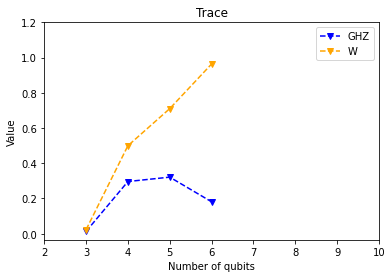

In [8]:
plt.plot(x, tracesghz, marker='v', linestyle='--', color='blue', label = 'GHZ')
plt.plot(x, tracesw, marker='v', linestyle='--', color='orange', label = 'W')
# plt.plot(x, traceshaar, marker='v', linestyle='--', color='green', label = 'Haar')
plt.title('Trace')
plt.xlabel('Number of qubits')
plt.xticks(np.arange(min(x) - 1, max(x) + 5, 1))
plt.yticks(np.arange(0, 1.4, 0.2))
plt.ylabel('Value')
plt.legend()
plt.show()